In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [80]:
cols = ["Tweet_ID", "Location","Sentiment","Tweet"]
data = pd.read_csv("twitter_training.csv")
data.columns = cols
data.head()
print("shape is:",data.shape)
print("Sentiment Counts are: \n",data.Sentiment.value_counts())
data.isnull().any()

shape is: (74681, 4)
Sentiment Counts are: 
 Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


Tweet_ID     False
Location     False
Sentiment    False
Tweet         True
dtype: bool

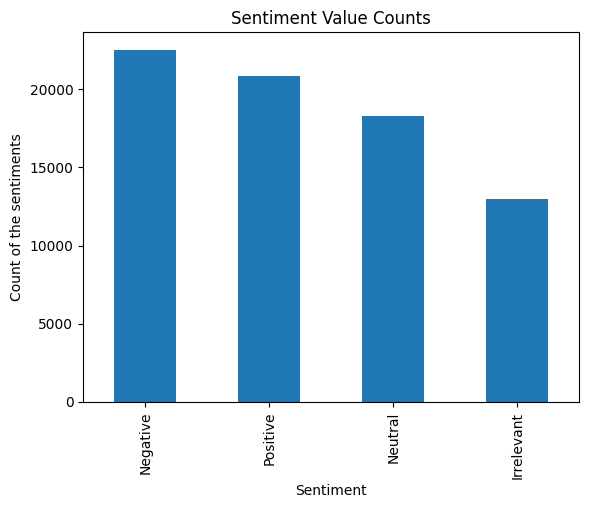

,Tweet_ID,Location,Sentiment,Tweet,length_of_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51.0
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50.0
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51.0
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57.0
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53.0


In [ ]:
data["length_of_text"] = data["Tweet"].str.len() 
data["Sentiment"].value_counts().plot(kind="bar", title="Sentiment Value Counts")
plt.ylabel("Count of the sentiments")
plt.show()
data.head()

In [82]:
# data[data["length_of_text"]>140].head()
(data["length_of_text"]>140).sum()
data[data.isnull().any(axis=1)].head()
print("total null values are: ",np.sum(data.isnull().any(axis=1)))
data.dropna(inplace=True)
data[data.isnull().any(axis=1)].head()
data.info()

total null values are:  686
<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tweet_ID        73995 non-null  int64  
 1   Location        73995 non-null  object 
 2   Sentiment       73995 non-null  object 
 3   Tweet           73995 non-null  object 
 4   length_of_text  73995 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [83]:
neg_tweets = data[data.Sentiment=="Positive"]
neg_str=[]
for t in neg_tweets.Tweet:
    neg_str.append(t)
neg_str=pd.Series(neg_str).str.cat(sep=" ")
neg_str

'I am coming to the borders and I will kill you all, im getting on borderlands and i will kill you all, im coming on borderlands and i will murder you all, im getting on borderlands 2 and i will murder you me all, im getting into borderlands and i can murder you all, So I spent a few hours making something for fun. . . If you don\'t know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg So I spent a couple of hours doing something for fun... If you don\'t know that I\'m a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here\'s the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg So I spent a few hours doing something for fun... If you don\'t know I\'m a HUGE @ Borderlands fan and Maya is one of my favorite characters. So I 

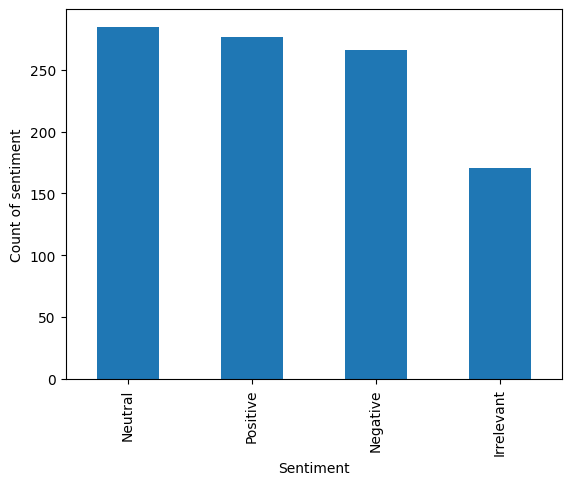

Tweet_ID     False
Location     False
Sentiment    False
Tweet        False
dtype: bool

In [84]:
test = pd.read_csv("twitter_validation.csv")
test.columns = cols
test.head()
test["Sentiment"].value_counts().plot(kind="bar")
plt.ylabel("Count of sentiment")
plt.show()
test.isnull().any()

In [85]:
x_train, y_train= data["Tweet"],data["Sentiment"]
x_test, y_test = test["Tweet"],test["Sentiment"]
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

model = MultinomialNB()
model.fit(x_train_vec,y_train)

MultinomialNB()

In [86]:
y_pred = model.predict(x_test_vec)
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))

accuracy_score:  0.8248248248248248
classification_report               precision    recall  f1-score   support

  Irrelevant       0.90      0.74      0.81       171
    Negative       0.77      0.88      0.82       266
     Neutral       0.89      0.75      0.82       285
    Positive       0.79      0.91      0.84       277

    accuracy                           0.82       999
   macro avg       0.84      0.82      0.82       999
weighted avg       0.83      0.82      0.82       999



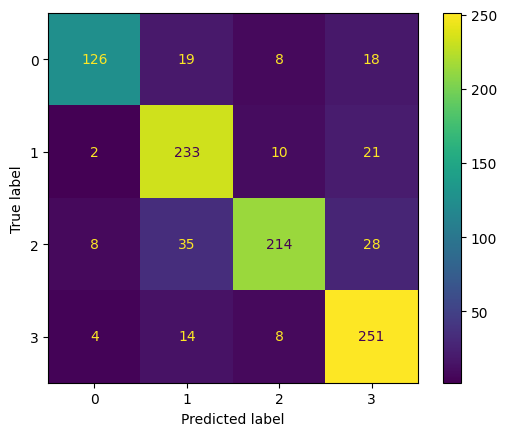

In [87]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot()
plt.show()

In [89]:
sample = "We need to kill them all"
sample = vectorizer.transform([sample])
answer = model.predict(sample)
answer[0]

'Negative'